In [ ]:
import numpy as np
import matplotlib.pyplot as plt

$$ \min \frac12 \|Ax - b\|_2^2 + \lambda \|x\|_1 $$

In [ ]:
m = 100
n = 1000
A = np.random.randn(m, n)
b = np.random.randn(m)
lam = 10

In [ ]:
def fista(grad, prox, alpha, x0, max_iter, lam):
  conv = [x0.copy()]
  x = x0.copy()
  y = x0.copy()
  for i in range(max_iter):
    x_next = prox(y - alpha * grad(y), lam*alpha)
    y = x_next + (i+1) / (i+4) * (x_next - x)
    x = x_next.copy()
    conv.append(x.copy())
  return x, conv

$$prox_{\alpha |\cdot|}(y) = \begin{cases} 0, & |y| < \alpha \\ y + \alpha, & y < -\alpha \\ y - \alpha, & y > \alpha \end{cases}$$

In [ ]:
def grad(x):
  return A.T @ (A @ x - b)

def prox(x, alpha):
  return np.sign(x) * np.maximum(np.abs(x) - alpha, 0)

In [ ]:
x0 = np.random.randn(n)

In [ ]:
x_fista, conv_fista = fista(grad, prox, 1e-4, x0, 5000, lam)

In [ ]:
import time

st = time.time()
fista(grad, prox, 1e-4, x0, 400, lam)
print(time.time() - st)

0.16976451873779297


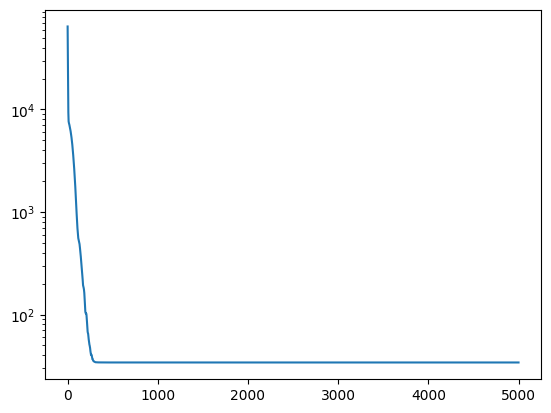

In [ ]:
plt.plot([lam * np.linalg.norm(x, 1) + 0.5 * (A @ x - b)@(A @ x - b) for x in conv_fista])
plt.yscale("log")

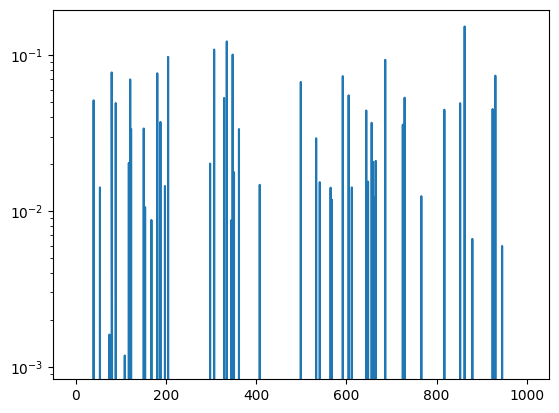

In [ ]:
plt.plot(np.abs(x_fista))
plt.yscale('log')

In [ ]:
def admm(update_x, update_z, x0, max_iter, rho):
  x = x0.copy()
  z = x.copy()
  mu = np.zeros(x.shape[0])
  conv_x = [x0.copy()]
  for i in range(max_iter):
    x = update_x(x, z, mu, rho)
    z = update_z(x, z, mu, rho)
    mu = mu + rho * (x - z)
    rho *= 1.3
    conv_x.append(x.copy())
  return x, conv_x

In [ ]:
ATA = A.T @ A
AAT = A @ A.T
ATb = A.T @ b
def update_x(x, z, mu, rho):
  return np.linalg.solve(ATA + rho * np.eye(A.shape[1]), -mu + rho * z + ATb)

def update_x_fast(x, z, mu, rho):
  rhs = -mu + rho * z + ATb
  mat = np.eye(A.shape[0]) + AAT / rho
  return (rhs - A.T @ (np.linalg.solve(mat, A @ rhs / rho))) / rho

def update_z(x, z, mu, rho):
  y = x + mu / rho
  return prox(y, lam / rho)



In [ ]:
rho = 1
x_admm, conv_admm = admm(update_x_fast, update_z, x0, 100, rho)

In [ ]:
st = time.time()
admm(update_x_fast, update_z, x0, 100, rho)
print(time.time() - st)

0.04944038391113281


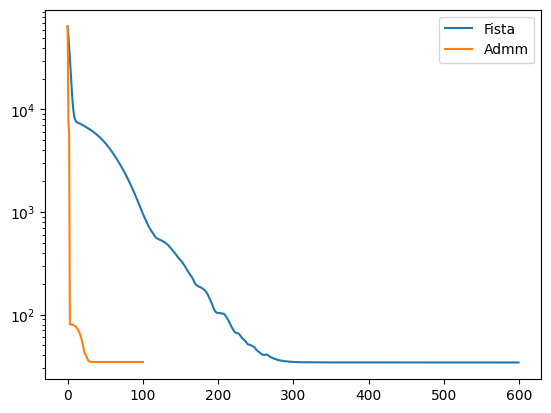

In [ ]:
plt.plot([lam * np.linalg.norm(x, 1) + 0.5 * (A @ x - b)@(A @ x - b) for x in conv_fista[:600]],label="Fista")
plt.plot([lam * np.linalg.norm(x, 1) + 0.5 * (A @ x - b)@(A @ x - b) for x in conv_admm], label="Admm")
plt.legend()
plt.yscale("log")